In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/.config/.last_update_check.json
/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/config_sentinel
/content/.config/default_configs.db
/content/.config/active_config
/content/.config/.last_survey_prompt.yaml
/content/.config/.last_opt_in_prompt.yaml
/content/.config/gce
/content/.config/logs/2024.10.21/13.21.53.990169.log
/content/.config/logs/2024.10.21/13.22.05.109353.log
/content/.config/logs/2024.10.21/13.22.15.226603.log
/content/.config/logs/2024.10.21/13.22.15.869361.log
/content/.config/logs/2024.10.21/13.22.04.157217.log
/content/.config/logs/2024.10.21/13.21.33.039045.log
/content/.config/configurations/config_default
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv


In [ ]:
df = pd.read_csv('/content/sample_data/Titanic.csv')

Определение размера датасета(891 строка, 5 столбцов)

In [ ]:
df.shape

(891, 12)

Показывает сколько пропущенных значений в каждом столбце датасета

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


в categorical_cols записываем все столбцы с типом данных object;

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

In [ ]:
categorical_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Преобразовываем категориальные данные перед обучением: проходимся по всем категориальным столбцам, инжектируем LabelEncoder, кодируем значения в столбцах и сохраняем данные обратно в DataFrame, сохраняем объект кодировщика меток в словаре

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,NaN,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


Заменяем Nan значения в столбце age медианными значениями столбца

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,28.0,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


В переменную X сохраняем датафрейм без столбца Survived, в переменную Y, добавляем этот столбец.

In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


Modeling

Показывает уровень корреляции между двумя столбцами

In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.035077,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,0.684121,0.157112
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.048252,-0.017230,-0.049105,0.047348,-0.049173,0.061959,-0.004557
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.104057
Age,0.034212,-0.064910,-0.339898,0.048252,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,-0.240839,-0.014205
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,0.043593,0.066654
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,-0.028324,0.038322
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.006041
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.221226


Разброс данных вокруг среднего значения

In [ ]:
import numpy as np
np.var(df['Sex'])

0.22821808306282707

A100 - 2m

In [ ]:
#feature_importances

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.8))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='RMSProp', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=80, batch_size=16, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.5464 - loss: 0.7476 - val_accuracy: 0.7407 - val_loss: 0.5714
Epoch 2/80
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6362 - loss: 0.6870 - val_accuracy: 0.8395 - val_loss: 0.5291
Epoch 3/80
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5929 - loss: 0.7109 - val_accuracy: 0.8395 - val_loss: 0.4940
Epoch 4/80
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6481 - loss: 0.6027 - val_accuracy: 0.8889 - val_loss: 0.4519
Epoch 5/80
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7294 - loss: 0.5915 - val_accuracy: 0.9259 - val_loss: 0.4208
Epoch 6/80
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7178 - loss: 0.5837 - val_accuracy: 0.9136 - val_loss: 0.3804
Epoch 7/80
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7624 - loss: 0.5376 - val_accuracy: 0.9136 - val_loss: 0.3533
Epoch 8/80
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7166 - loss: 0.5739 - val_accuracy: 0.9136 - val_los

.pkl .h5 .gguf

In [ ]:
import joblib
joblib.dump(model, 'fully-connected-model.pkl')

['fully-connected-model.pkl']

In [ ]:
model_loaded = joblib.load('fully-connected-model.pkl')

Epoch 1/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8156 - loss: 0.4360 - val_accuracy: 0.9012 - val_loss: 0.2959
Epoch 2/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8025 - loss: 0.4526 - val_accuracy: 0.9012 - val_loss: 0.2867
Epoch 3/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8357 - loss: 0.4279 - val_accuracy: 0.9012 - val_loss: 0.3117
Epoch 4/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8163 - loss: 0.4338 - val_accuracy: 0.9012 - val_loss: 0.3084
Epoch 5/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8123 - loss: 0.4357 - val_accuracy: 0.9012 - val_loss: 0.2869
Epoch 6/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8334 - loss: 0.4184 - val_accuracy: 0.9012 - val_loss: 0.3032
Epoch 7/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8137 - loss: 0.4331 - val_accuracy: 0.9012 - val_loss: 0.3037
Epoch 8/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8123 - loss: 0.4585 - val_accuracy: 0.9012 - val_loss

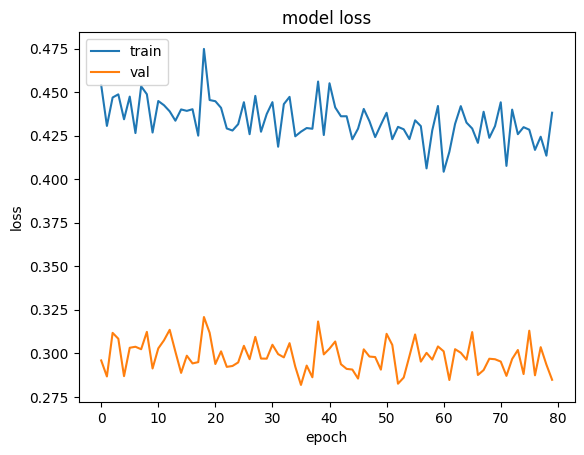

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
history = model.fit(X_train, y_train, epochs=80, batch_size=32, validation_split=0.1) #обучаем модель
plt.plot(history.history['loss']) #значения функций потерь на валид.выборке
plt.plot(history.history['val_loss']) #Значения функции потерь для валидационной выборки на каждой эпохе
plt.title('model loss') #заголовок графика
plt.ylabel('loss') # подпись оси Y - потери
plt.xlabel('epoch') #подписи оси Х - эпохи
plt.legend(['train', 'val'], loc='upper left') #Добавляет легенду с метками "train" (обучение) и "val" (валидация)
plt.show() #отображение графика

Пример хорошего графика

In [ ]:
df = pd.read_csv('/content/sample_data/Titanic.csv')

In [ ]:
df.shape

(891, 12)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Find Outliers in DataFrame

import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5, 100],
    'B': [10, 12, 14, 13, 15, 200],
    'C': [5, 6, 7, 8, 9, 300]
}

df = pd.DataFrame(data)

# Function to find outliers
def find_outliers(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Get outliers
outliers = find_outliers(df)
print(outliers)

{'A':      A    B    C
5  100  200  300, 'B':      A    B    C
5  100  200  300, 'C':      A    B    C
5  100  200  300}


Мои графики и анализ датафрейма:

In [ ]:
df

,A,B,C
0,1,10,5
1,2,12,6
2,3,14,7
3,4,13,8
4,5,15,9
5,100,200,300


1. Признак: Выживание

Влияние пола на выживание

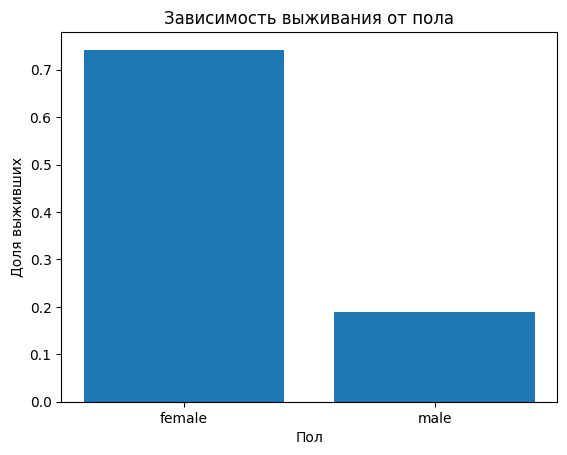

In [ ]:
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/Titanic.csv')
survived_sex = df.groupby('Sex')['Survived'].mean()
plt.bar(survived_sex.index, survived_sex.values)
plt.xlabel('Пол')
plt.ylabel('Доля выживших')
plt.title('Зависимость выживания от пола')
plt.show()

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Влияние пассажирского класса на выживание

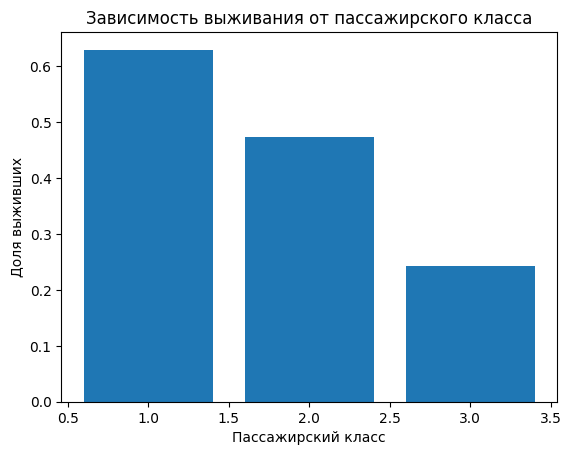

In [ ]:
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/Titanic.csv')
survived_sex = df.groupby('Pclass')['Survived'].mean()
plt.bar(survived_sex.index, survived_sex.values)
plt.xlabel('Пассажирский класс')
plt.ylabel('Доля выживших')
plt.title('Зависимость выживания от пассажирского класса')
plt.show()

Влияние возраста на выживание

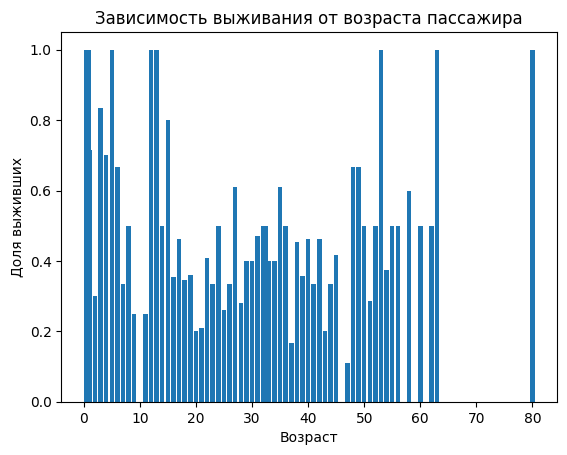

In [ ]:
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/Titanic.csv')
survived_sex = df.groupby('Age')['Survived'].mean()
plt.bar(survived_sex.index, survived_sex.values)
plt.xlabel('Возраст')
plt.ylabel('Доля выживших')
plt.title('Зависимость выживания от возраста пассажира')
plt.show()

In [ ]:
Кого было на борту больше: женщин или мужчин

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


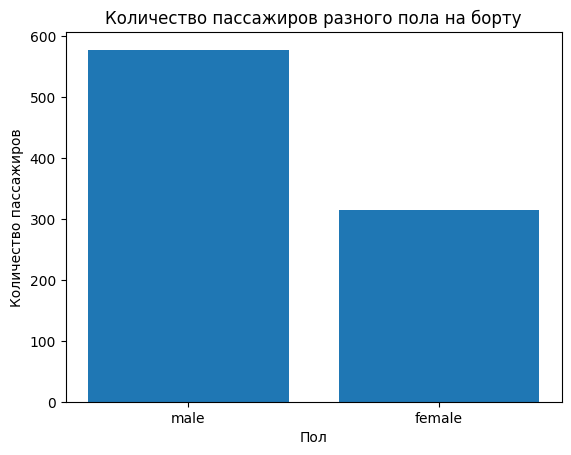

In [ ]:
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/Titanic.csv')
passenger_counts = df['Sex'].value_counts()
plt.bar(passenger_counts.index, passenger_counts.values)
plt.xlabel('Пол')
plt.ylabel('Количество пассажиров')
plt.title('Количество пассажиров разного пола на борту')
plt.show()

In [ ]:
df[df['Sex'] == 'female'].value_counts()

,,,,,,,,,,,,count
PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C,1
628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S,1
619,1,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C,1
310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C,1
308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)",female,17.0,1,0,PC 17758,108.9000,C65,C,1


In [ ]:
df[df['Sex'] == 'female']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
women_df = df[df['Sex'] == 'female']
women_df['Age'], women_df['Survived']

(1      38.0
 2      26.0
 3      35.0
 8      27.0
 9      14.0
        ... 
 880    25.0
 882    22.0
 885    39.0
 887    19.0
 888     NaN
 Name: Age, Length: 314, dtype: float64,
 1      1
 2      1
 3      1
 8      1
 9      1
       ..
 880    1
 882    0
 885    0
 887    1
 888    0
 Name: Survived, Length: 314, dtype: int64)

Зависимость выживания женщин от их возраста(alpha=0.5: Устанавливает прозрачность точек на графике: для разнообразия)

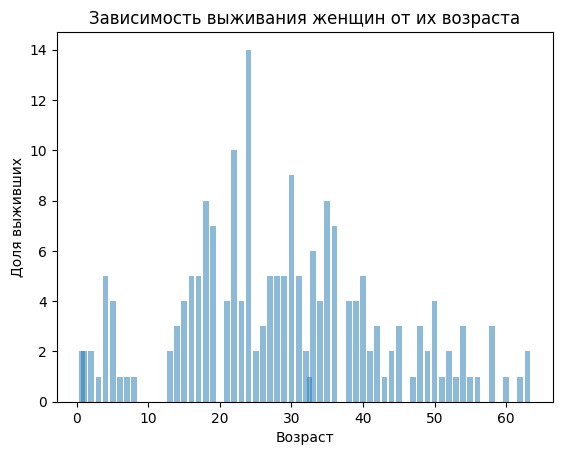

In [ ]:
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/Titanic.csv')
women_df = df[df['Sex'] == 'female']
age_survived = women_df.groupby('Age')['Survived'].sum()
plt.bar(age_survived.index, age_survived.values, alpha=0.5)
plt.xlabel('Возраст')
plt.ylabel('Доля выживших')
plt.title('Зависимость выживания женщин от их возраста')
plt.show()


Зависимость выживания мужчин от их возраста

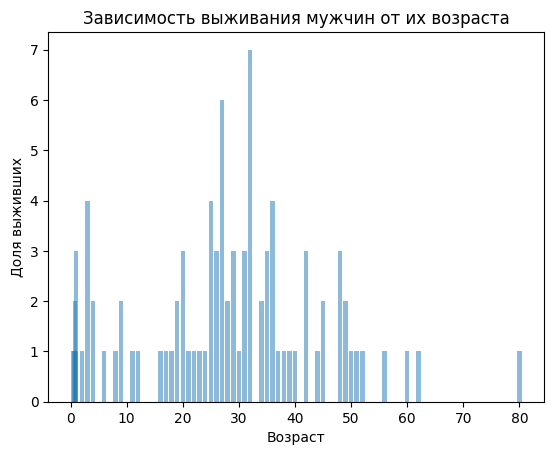

In [ ]:
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/Titanic.csv')
men_df = df[df['Sex'] == 'male']
age_survived = men_df.groupby('Age')['Survived'].sum()
plt.bar(age_survived.index, age_survived.values, alpha=0.5)
plt.xlabel('Возраст')
plt.ylabel('Доля выживших')
plt.title('Зависимость выживания мужчин от их возраста')
plt.show()


In [ ]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


Количество людей в каждом классе

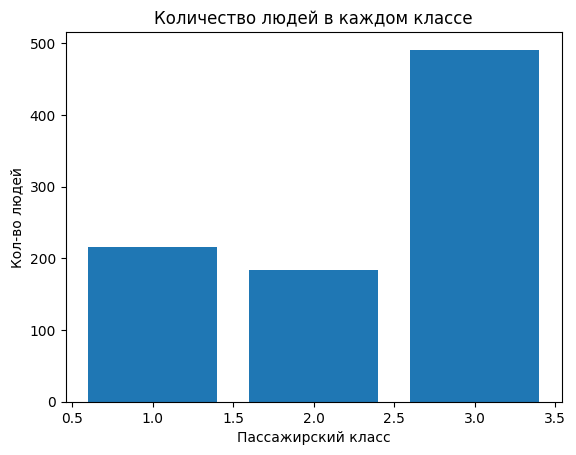

In [ ]:
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/Titanic.csv')
pclass_df = df['Pclass'].value_counts()
plt.bar(pclass_df.index, pclass_df.values)
plt.xlabel('Пассажирский класс')
plt.ylabel('Кол-во людей')
plt.title('Количество людей в каждом классе')
plt.show()

Зависимость выживания от пассажирского класса

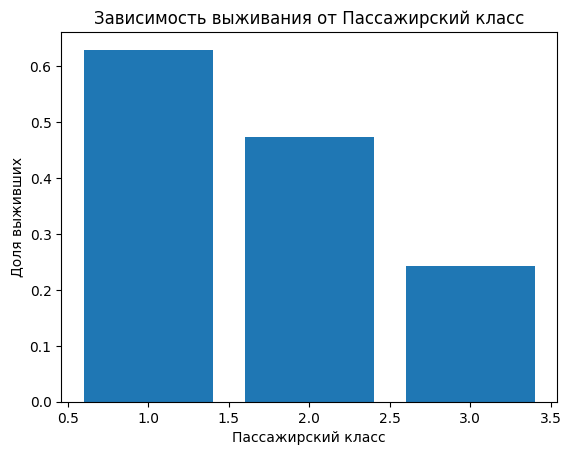

In [ ]:
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/Titanic.csv')
survived_sex = df.groupby('Pclass')['Survived'].mean()
plt.bar(survived_sex.index, survived_sex.values)
plt.xlabel('Пассажирский класс')
plt.ylabel('Доля выживших')
plt.title('Зависимость выживания от пассажирского класса')
plt.show()

Зависимость пассажирского класса от тарифа

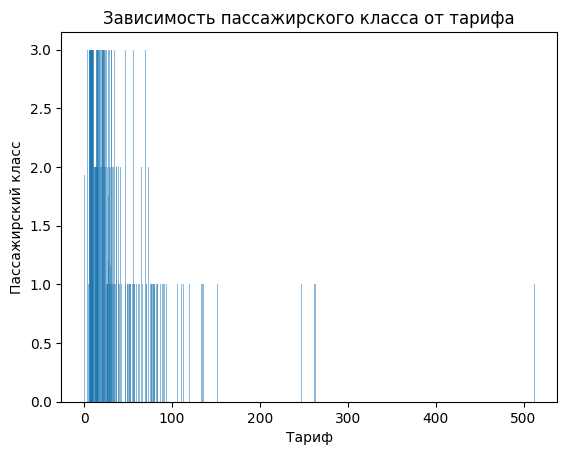

In [ ]:
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/Titanic.csv')
survived_sex = df.groupby('Fare')['Pclass'].mean()
plt.bar(survived_sex.index, survived_sex.values, alpha=0.5)
plt.xlabel('Тариф')
plt.ylabel('Пассажирский класс')
plt.title('Зависимость пассажирского класса от тарифа')
plt.show()

In [ ]:
df.groupby(['Sex', 'Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [ ]:
df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


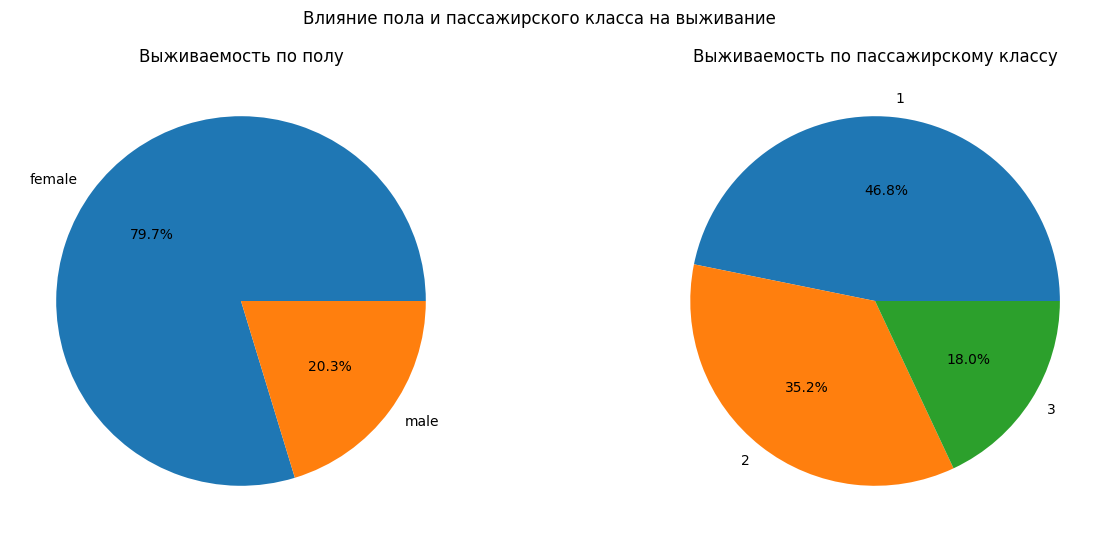

In [ ]:
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/Titanic.csv')

survival_stats = df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()

figsize, ax = plt.subplots(1, 2, figsize=(15, 6))

df.groupby('Sex')['Survived'].mean().plot(kind='pie', autopct='%1.1f%%', ax=ax[0])
ax[0].set_ylabel('')
ax[0].set_title('Выживаемость по полу')

df.groupby('Pclass')['Survived'].mean().plot(kind='pie', autopct='%1.1f%%', ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_title('Выживаемость по пассажирскому классу')

plt.suptitle('Влияние пола и пассажирского класса на выживание')
plt.show()
